    Vanshita Biyani - 067 - PGDBDA - Statistics Module End Exam

Problem Statement- Loan providing companies face challenges in assessing applicants with insufficient or non-existent credit histories, leading to potential defaults. This case study focuses on identifying patterns in loan repayment behavior to address risks associated with loan approvals and defaults.

In [1]:
import pandas as pd #Import necessary library for data manipulation

**Load Application Data File**

In [2]:
dfa=pd.read_csv(r'/content/drive/MyDrive/Vanshita/application_data.csv') #load application data into dataframe

In [3]:
pd.set_option('display.max_columns', None) #set option to display all columns of dataset

In [4]:
dfa.shape #Get the number of rows and columns for application data

(307511, 122)

In [5]:
dfa #Display application data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
dfa.info() #Get information about columns,count of non-null values,memory usage,etc about application data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
for i in dfa.columns:
  print(i)    #print all columns of application data

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [8]:
# List of irrelevant columns to drop from application data
columns_to_drop = [
     "DAYS_BIRTH",
    "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "FLAG_MOBIL",
    "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL",
     "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START",
    "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION",
    "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY",
     "APARTMENTS_AVG",
    "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG",
    "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG",
    "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG",
    "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE",
    "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE", "COMMONAREA_MODE",
    "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE",
    "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE",
    "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI",
    "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MEDI",
    "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMAX_MEDI",
    "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI",
    "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE",
    "HOUSETYPE_MODE", "TOTALAREA_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE",
    "OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10",
    "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"
]
dfa=dfa.drop(columns_to_drop,axis=1)

In [9]:
dfa #Display application data after removing irrelevant columns

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,NaN,Laborers,1.0,2,2,Business Entity Type 3,0.083037,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,NaN,Core staff,2.0,1,1,School,0.311267,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,Laborers,1.0,2,2,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,NaN,Laborers,2.0,2,2,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,NaN,Core staff,1.0,2,2,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,NaN,Sales staff,1.0,1,1,Services,0.145570,0.681632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,NaN,NaN,1.0,2,2,XNA,NaN,0.115992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,NaN,Managers,1.0,3,3,School,0.744026,0.535722,0.218859,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,NaN,Laborers,2.0,2,2,Business Entity Type 1,NaN,0.514163,0.661024,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
dfp=pd.read_csv(r'/content/drive/MyDrive/Vanshita/previous_application.csv') #load previous application data into dataframe

In [11]:
dfp #Display previous application data into dataframe

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [12]:
dfp.info()  #Get information about columns,count of non-null values,memory usage,etc about previous application data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [13]:
#Drop irrelevant columns from previous application data
columns_to_drop=[
 'AMT_DOWN_PAYMENT',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'DAYS_DECISION',
 'NAME_TYPE_SUITE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

dfp=dfp.drop(columns_to_drop,axis=1)

In [14]:
dfp #Display previous application data after dropping irrelevant columns

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,Cash through the bank,XAP,Repeater,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,XNA,XAP,Repeater,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,Cash through the bank,XAP,Repeater,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,Cash through the bank,XAP,Repeater,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,Cash through the bank,HC,Repeater,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,XAP,Approved,Cash through the bank,XAP,Refreshed,low_normal
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,XAP,Approved,Cash through the bank,XAP,New,middle
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,XAP,Approved,Cash through the bank,XAP,Repeater,low_normal
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,XNA,Approved,Cash through the bank,XAP,Repeater,low_normal


In [15]:
dfp.info() #Get information about number of columns,non-null values present in each column,memory usage of previous application data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   NAME_PAYMENT_TYPE       1670214 non-null  object 
 10  CODE_REJECT_REASON      1670214 non-null  object 
 11  NAME_CLIENT_TYPE        1670214 non-null  object 
 12  NAME_YIELD_GROUP        1670214 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 165.7+ M

**Finding Null Values & Imputing them with certain calculated values**

<Axes: ylabel='AMT_ANNUITY'>

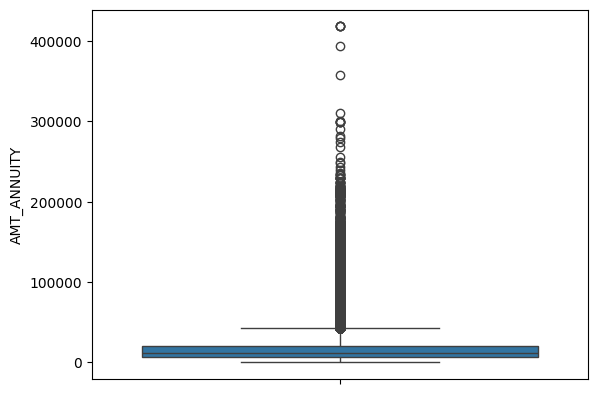

In [16]:
import seaborn as sns
sns.boxplot(y=dfp.AMT_ANNUITY)   # As the boxplot of AMT_ANNUITY column shows that there is presence of outliers so it is not symmetric.

In [17]:
dfp['AMT_ANNUITY']=dfp['AMT_ANNUITY'].fillna(dfp.AMT_ANNUITY.median()) #We replace null values with median as graph representing values is not symmetric.

In [18]:
dfp.AMT_ANNUITY.isnull().sum()

0

<Axes: ylabel='AMT_GOODS_PRICE'>

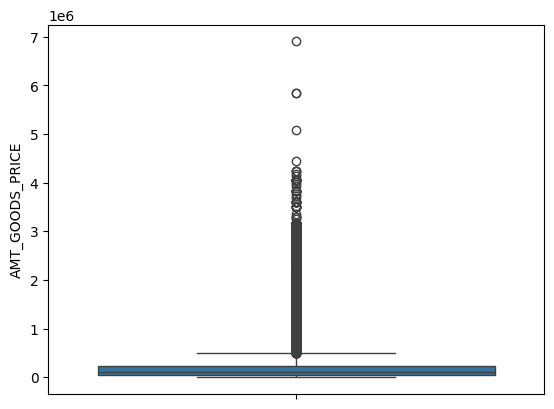

In [19]:
import seaborn as sns
sns.boxplot(y=dfp.AMT_GOODS_PRICE) # As the boxplot of AMT_GOODS_PRICE column shows that there is presence of outliers so it is not symmetric.

In [20]:
dfp['AMT_GOODS_PRICE']=dfp['AMT_GOODS_PRICE'].fillna(dfp.AMT_GOODS_PRICE.median()) #We replace null values with median as graph representing values is not symmetric.

In [21]:
dfp.AMT_GOODS_PRICE.isnull().sum()

0

In [22]:
dfp.info() #To verify if all null values are filled in previous application data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1670214 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1670214 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   NAME_PAYMENT_TYPE       1670214 non-null  object 
 10  CODE_REJECT_REASON      1670214 non-null  object 
 11  NAME_CLIENT_TYPE        1670214 non-null  object 
 12  NAME_YIELD_GROUP        1670214 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 165.7+ M

In [23]:
dfa.info() #To check columns having null values in application data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

<Axes: ylabel='AMT_ANNUITY'>

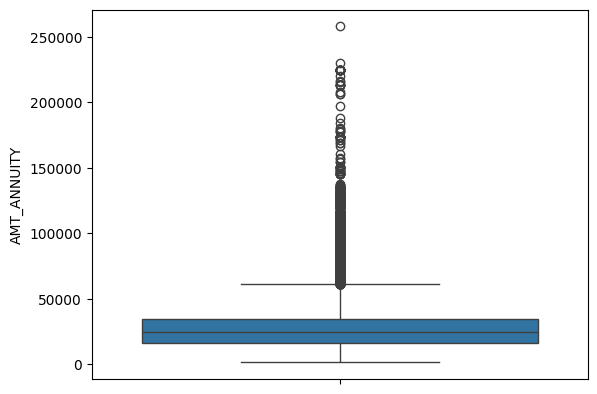

In [24]:
import seaborn as sns
sns.boxplot(y=dfa.AMT_ANNUITY) # As the boxplot of AMT_ANNUITY column shows that there is presence of outliers so it is not symmetric.

In [25]:
dfa['AMT_ANNUITY']=dfa['AMT_ANNUITY'].fillna(dfa['AMT_ANNUITY'].median()) #We replace null values with median as graph representing values is not symmetric.

In [26]:
dfa['AMT_ANNUITY'].isnull().sum()

0

<Axes: ylabel='AMT_GOODS_PRICE'>

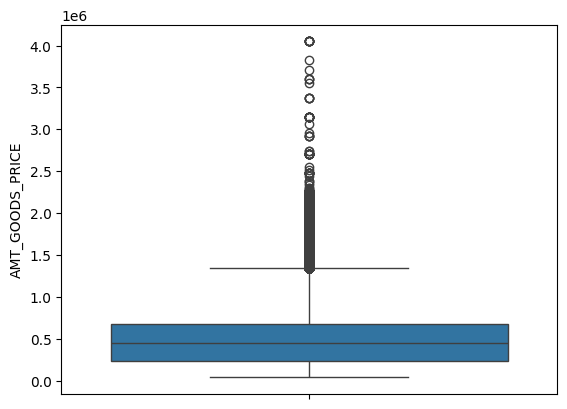

In [27]:
import seaborn as sns
sns.boxplot(y=dfa.AMT_GOODS_PRICE) # As the boxplot of AMT_GOODS_PRICE column shows that there is presence of outliers so it is not symmetric.

In [28]:
dfa['AMT_GOODS_PRICE']=dfa['AMT_GOODS_PRICE'].fillna(dfa.AMT_GOODS_PRICE.median()) #We replace null values with median as graph representing values is not symmetric.

In [29]:
dfa.AMT_GOODS_PRICE.isnull().sum()

0

<Axes: ylabel='OWN_CAR_AGE'>

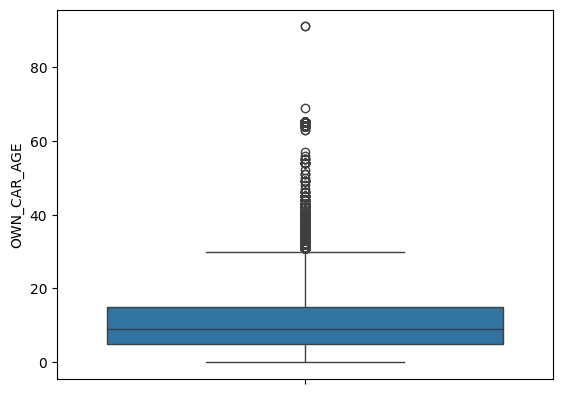

In [30]:
import seaborn as sns
sns.boxplot(y=dfa.OWN_CAR_AGE) # As the boxplot of OWN_CAR_AGE column shows that there is presence of outliers so it is not symmetric.

In [31]:
dfa['OWN_CAR_AGE']=dfa['OWN_CAR_AGE'].fillna(dfa.OWN_CAR_AGE.median()) #We replace null values with median as graph representing values is not symmetric.

In [32]:
dfa.OWN_CAR_AGE.isnull().sum()

0

In [33]:
dfa=dfa.drop('NAME_TYPE_SUITE',axis=1) #Dropping NAME_TYPE_SUITE column as it is not required for further analysis

In [34]:
dfa #Displaying application data after filling null values

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9.0,Laborers,1.0,2,2,Business Entity Type 3,0.083037,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,9.0,Core staff,2.0,1,1,School,0.311267,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,Laborers,1.0,2,2,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,9.0,Laborers,2.0,2,2,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,9.0,Core staff,1.0,2,2,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,0.032561,9.0,Sales staff,1.0,1,1,Services,0.145570,0.681632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,9.0,NaN,1.0,2,2,XNA,NaN,0.115992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,0.005002,9.0,Managers,1.0,3,3,School,0.744026,0.535722,0.218859,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,9.0,Laborers,2.0,2,2,Business Entity Type 1,NaN,0.514163,0.661024,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
dfa.shape[0]-dfa.OCCUPATION_TYPE.count() #count number of null values present in dfa.OCCUPATION_TYPE column

96391

In [36]:
count_occu=dfa.OCCUPATION_TYPE.value_counts().reset_index() #getting frequency of OCCUPATION_TYPE
count_occu

,OCCUPATION_TYPE,count
0,Laborers,55186
1,Sales staff,32102
2,Core staff,27570
3,Managers,21371
4,Drivers,18603
5,High skill tech staff,11380
6,Accountants,9813
7,Medicine staff,8537
8,Security staff,6721
9,Cooking staff,5946


In [37]:
count_occu['prop']=count_occu['count']/211120 #getting proportion of OCCUPATION_TYPE
count_occu

,OCCUPATION_TYPE,count,prop
0,Laborers,55186,0.261396
1,Sales staff,32102,0.152056
2,Core staff,27570,0.130589
3,Managers,21371,0.101227
4,Drivers,18603,0.088116
5,High skill tech staff,11380,0.053903
6,Accountants,9813,0.046481
7,Medicine staff,8537,0.040437
8,Security staff,6721,0.031835
9,Cooking staff,5946,0.028164


In [38]:
count_occu['tofill']=round((count_occu['prop']*96391),0) #getting count of proportion of total null values to be filled by each OCCUPATION_TYPE
count_occu

,OCCUPATION_TYPE,count,prop,tofill
0,Laborers,55186,0.261396,25196.0
1,Sales staff,32102,0.152056,14657.0
2,Core staff,27570,0.130589,12588.0
3,Managers,21371,0.101227,9757.0
4,Drivers,18603,0.088116,8494.0
5,High skill tech staff,11380,0.053903,5196.0
6,Accountants,9813,0.046481,4480.0
7,Medicine staff,8537,0.040437,3898.0
8,Security staff,6721,0.031835,3069.0
9,Cooking staff,5946,0.028164,2715.0


In [39]:
import numpy as np
index_of_null=np.where(dfa.OCCUPATION_TYPE.isnull())[0] #getting indicies of rows having null values of OCCUPATION_TYPE column
index_of_null

array([     8,     11,     23, ..., 307500, 307505, 307507])

In [40]:
len(index_of_null)

96391

In [41]:
occupation_data = {
    'Laborers': 25196,
    'Sales staff': 14657,
    'Core staff': 12588,
    'Managers': 9757,
    'Drivers': 8494,
    'High skill tech staff': 5196,
    'Accountants': 4480,
    'Medicine staff': 3898,
    'Security staff': 3069,
    'Cooking staff': 2715,
    'Cleaning staff': 2124,
    'Private service staff': 1211,
    'Low-skill Laborers': 956,
    'Waiters/barmen staff': 615,
    'Secretaries': 596,
    'Realty agents': 342,
    'HR staff': 257,
    'IT staff': 240
}        #get the number of records to be filled for each OCCUPATION_TYPE in a dictionary

In [42]:
fill_values = []
for category, count in occupation_data.items():
    fill_values.extend([category] * int(count)) #create a new list containing these values of each OCCUPATION_TYPE as many times as mentioned above one after other

In [43]:
np.random.shuffle(fill_values) #shuffle this list to randomly give values

In [44]:
dfa.loc[index_of_null,'OCCUPATION_TYPE']=fill_values #update thenull value records with value in list

In [45]:
dfa.OCCUPATION_TYPE.isnull().sum() #to check if any null value is remaining to be filled

0

In [46]:
dfa.OCCUPATION_TYPE.value_counts() #to check new frequency of OCCUPATION_TYPE

,count
OCCUPATION_TYPE,
Laborers,80382
Sales staff,46759
Core staff,40158
Managers,31128
Drivers,27097
High skill tech staff,16576
Accountants,14293
Medicine staff,12435
Security staff,9790


In [47]:
dfa.info() #to check if count of non-null values is increased for OCCUPATION_TYPE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [48]:
dfa['EXT_SOURCE_1']=dfa['EXT_SOURCE_1'].fillna(dfa.EXT_SOURCE_1.median()) #We replace null values with median as graph representing values is not symmetric.

In [49]:
dfa['EXT_SOURCE_2']=dfa['EXT_SOURCE_2'].fillna(dfa.EXT_SOURCE_2.median()) #We replace null values with median as graph representing values is not symmetric.

In [50]:
dfa['EXT_SOURCE_3']=dfa['EXT_SOURCE_3'].fillna(dfa.EXT_SOURCE_3.median()) #We replace null values with median as graph representing values is not symmetric.

In [51]:
dfa['AMT_REQ_CREDIT_BUREAU_HOUR']=dfa['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(dfa.AMT_REQ_CREDIT_BUREAU_HOUR.median()) #We replace null values with median as graph representing values is not symmetric.

In [52]:
dfa['AMT_REQ_CREDIT_BUREAU_DAY']=dfa['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(dfa.AMT_REQ_CREDIT_BUREAU_DAY.median()) #We replace null values with median as graph representing values is not symmetric.

In [53]:
dfa['AMT_REQ_CREDIT_BUREAU_WEEK']=dfa['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(dfa.AMT_REQ_CREDIT_BUREAU_WEEK.median()) #We replace null values with median as graph representing values is not symmetric.

In [54]:
dfa['AMT_REQ_CREDIT_BUREAU_MON']=dfa['AMT_REQ_CREDIT_BUREAU_MON'].fillna(dfa.AMT_REQ_CREDIT_BUREAU_MON.median()) #We replace null values with median as graph representing values is not symmetric.

In [55]:
dfa['AMT_REQ_CREDIT_BUREAU_QRT']=dfa['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(dfa.AMT_REQ_CREDIT_BUREAU_QRT.median()) #We replace null values with median as graph representing values is not symmetric.

In [56]:
dfa['AMT_REQ_CREDIT_BUREAU_YEAR']=dfa['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(dfa.AMT_REQ_CREDIT_BUREAU_YEAR.median()) #We replace null values with median as graph representing values is not symmetric.

In [57]:
dfa.info() #To verify if columns having null values are filled in application data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [58]:
merge_df=pd.merge(dfa,dfp,on='SK_ID_CURR',how='inner') #merge both dataframes to get all clients having records of their previous loan/credit history also

In [59]:
merge_df.shape #get number of rows & number of columns

(1413701, 43)

In [60]:
merge_df #Display merged dataframe

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_YIELD_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9.0,Laborers,1.0,2,2,Business Entity Type 3,0.083037,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,XNA,XAP,New,low_normal
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,9.0,Core staff,2.0,1,1,School,0.311267,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,XNA,XAP,Repeater,low_normal
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,9.0,Core staff,2.0,1,1,School,0.311267,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,Cash through the bank,XAP,Refreshed,middle
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,9.0,Core staff,2.0,1,1,School,0.311267,0.622246,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,Cash through the bank,XAP,Refreshed,middle
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,26.0,Laborers,1.0,2,2,Government,0.505998,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,Cash through the bank,XAP,New,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,9.0,Laborers,2.0,1,1,Business Entity Type 3,0.734460,0.708569,0.113922,0.0,0.0,0.0,2.0,0.0,1.0,2073384,Cash loans,16400.610,229500.0,254340.0,229500.0,XNA,Approved,Cash through the bank,XAP,Repeater,middle
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,9.0,Laborers,2.0,1,1,Business Entity Type 3,0.734460,0.708569,0.113922,0.0,0.0,0.0,2.0,0.0,1.0,1708056,Revolving loans,2250.000,45000.0,45000.0,45000.0,XAP,Refused,XNA,HC,Repeater,XNA
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,9.0,Laborers,2.0,1,1,Business Entity Type 3,0.734460,0.708569,0.113922,0.0,0.0,0.0,2.0,0.0,1.0,1296007,Cash loans,30737.655,765000.0,1067940.0,765000.0,Repairs,Refused,Cash through the bank,HC,Repeater,low_normal
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Commercial associate,Higher education,Married,House / apartment,0.046220,9.0,Laborers,2.0,1,1,Business Entity Type 3,0.734460,0.708569,0.113922,0.0,0.0,0.0,2.0,0.0,1.0,2631384,Cash loans,54022.140,1170000.0,1271929.5,1170000.0,XNA,Approved,Cash through the bank,XAP,Repeater,low_normal


In [61]:
merge_df.TARGET.value_counts() #get frequency of target column

,count
TARGET,
0,1291341
1,122360


**Removing Outliers from Merged DataFrame**

In [62]:
numerical_column = merge_df.select_dtypes(include=[np.number]).columns #Identify numerical columns

upper_fence = {} #store upper fence for each column
for column in numerical_column:
  if column!='TARGET':
       Q1 = merge_df[column].quantile(0.25)  # First quartile (25th percentile)
       Q3 = merge_df[column].quantile(0.75)  # Third quartile (75th percentile)
       IQR = Q3 - Q1  # Interquartile range
       upper_fence[column] = Q3 + 1.5 * IQR    # Calculate upper fence for each numerical column
  else:
      continue

print("Upper fences for numerical columns:")
print(upper_fence) # Print the upper fences for reference

for column, fence in upper_fence.items():
    merge_df = merge_df[merge_df[column] <= fence]  # Remove rows where any numerical column exceeds its upper fence

print("\nFiltered DataFrame:")
print(merge_df) # Display the filtered DataFrame




Upper fences for numerical columns:
{'SK_ID_CURR': 634844.0, 'CNT_CHILDREN': 2.5, 'AMT_INCOME_TOTAL': 348750.0, 'AMT_CREDIT_x': 1614960.0, 'AMT_ANNUITY_x': 61123.5, 'AMT_GOODS_PRICE_x': 1341000.0, 'REGION_POPULATION_RELATIVE': 0.05660950000000001, 'OWN_CAR_AGE': 9.0, 'CNT_FAM_MEMBERS': 4.5, 'REGION_RATING_CLIENT': 2.0, 'REGION_RATING_CLIENT_W_CITY': 2.0, 'EXT_SOURCE_1': 0.5059979305057544, 'EXT_SOURCE_2': 1.06733247934454, 'EXT_SOURCE_3': 0.981866321183295, 'AMT_REQ_CREDIT_BUREAU_HOUR': 0.0, 'AMT_REQ_CREDIT_BUREAU_DAY': 0.0, 'AMT_REQ_CREDIT_BUREAU_WEEK': 0.0, 'AMT_REQ_CREDIT_BUREAU_MON': 0.0, 'AMT_REQ_CREDIT_BUREAU_QRT': 0.0, 'AMT_REQ_CREDIT_BUREAU_YEAR': 8.5, 'SK_ID_PREV': 3768011.0, 'AMT_ANNUITY_y': 30760.83, 'AMT_APPLICATION': 420374.25, 'AMT_CREDIT_y': 501779.25, 'AMT_GOODS_PRICE_y': 350437.5}

Filtered DataFrame:
         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
3            100

In [63]:
merge_df.TARGET.value_counts() #to get frequency of target column after removing outliers from all columns of merged dataframe

,count
TARGET,
0,342437
1,36147


**Final DataFrame after dropping irrelevant columns,removing outliers & imputing null values**


In [65]:
merge_df.info() #Get final dataframe after merging & removing outliers

<class 'pandas.core.frame.DataFrame'>
Index: 378584 entries, 0 to 1413692
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   378584 non-null  int64  
 1   TARGET                       378584 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         378584 non-null  object 
 3   CODE_GENDER                  378584 non-null  object 
 4   FLAG_OWN_CAR                 378584 non-null  object 
 5   FLAG_OWN_REALTY              378584 non-null  object 
 6   CNT_CHILDREN                 378584 non-null  int64  
 7   AMT_INCOME_TOTAL             378584 non-null  float64
 8   AMT_CREDIT_x                 378584 non-null  float64
 9   AMT_ANNUITY_x                378584 non-null  float64
 10  AMT_GOODS_PRICE_x            378584 non-null  float64
 11  NAME_INCOME_TYPE             378584 non-null  object 
 12  NAME_EDUCATION_TYPE          378584 non-null  object 
 13  NAM

**Univariate Analysis**

Analysis for NAME_CONTRACT_TYPE_x:


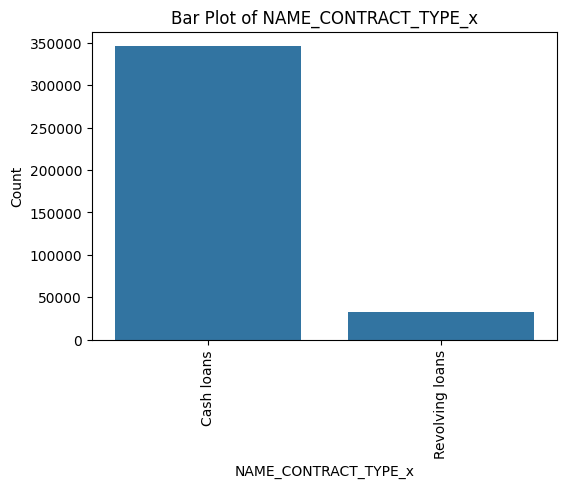

Analysis for CODE_GENDER:


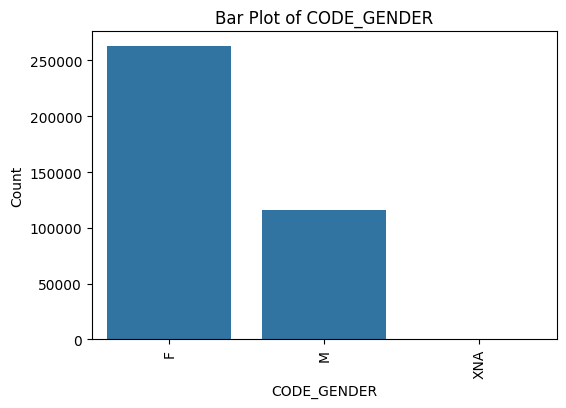

Analysis for FLAG_OWN_CAR:


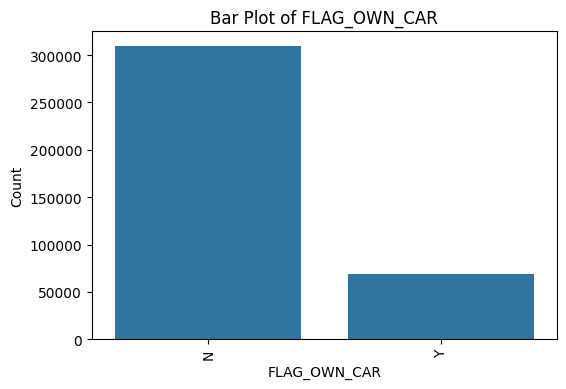

Analysis for FLAG_OWN_REALTY:


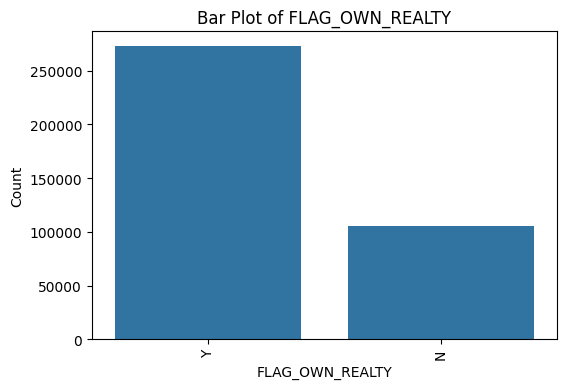

Analysis for CNT_CHILDREN:
Summary statistics:
count    378584.000000
mean          0.348684
std           0.624183
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: CNT_CHILDREN, dtype: float64



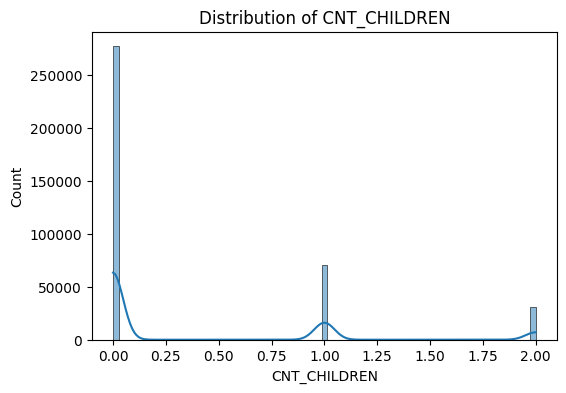

Analysis for AMT_INCOME_TOTAL:
Summary statistics:
count    378584.000000
mean     148248.575359
std       60613.424017
min       25650.000000
25%      108000.000000
50%      135000.000000
75%      180000.000000
max      346500.000000
Name: AMT_INCOME_TOTAL, dtype: float64



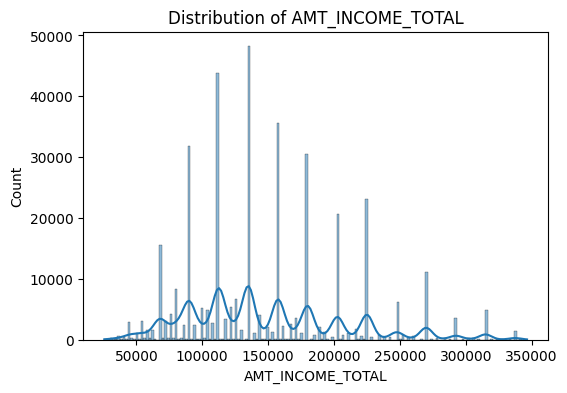

Analysis for AMT_CREDIT_x:
Summary statistics:
count    3.785840e+05
mean     4.952886e+05
std      3.055971e+05
min      4.500000e+04
25%      2.547000e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.609272e+06
Name: AMT_CREDIT_x, dtype: float64



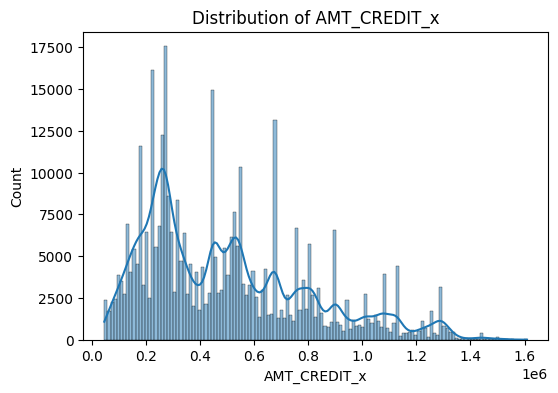

Analysis for AMT_ANNUITY_x:
Summary statistics:
count    378584.000000
mean      23616.284858
std       10947.905364
min        1993.500000
25%       15115.500000
50%       22455.000000
75%       30393.000000
max       61123.500000
Name: AMT_ANNUITY_x, dtype: float64



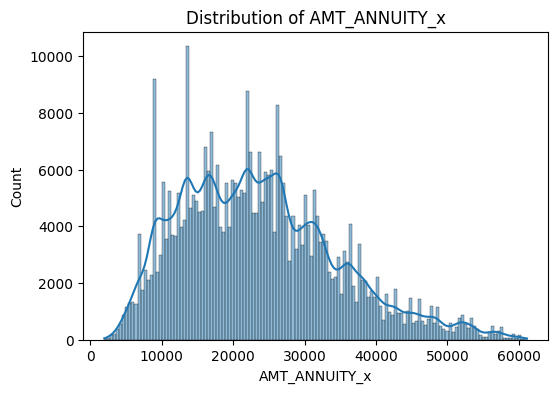

Analysis for AMT_GOODS_PRICE_x:
Summary statistics:
count    3.785840e+05
mean     4.424000e+05
std      2.743457e+05
min      4.500000e+04
25%      2.250000e+05
50%      4.050000e+05
75%      6.525000e+05
max      1.341000e+06
Name: AMT_GOODS_PRICE_x, dtype: float64



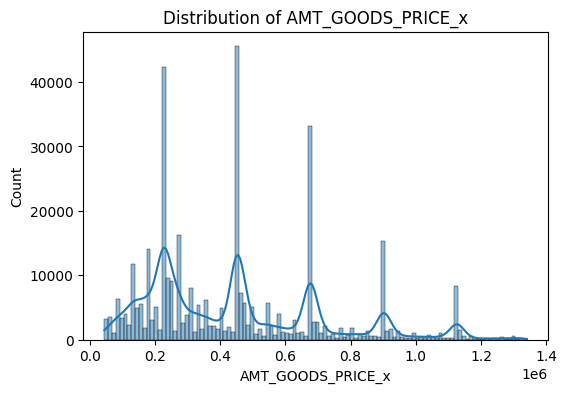

Analysis for NAME_INCOME_TYPE:


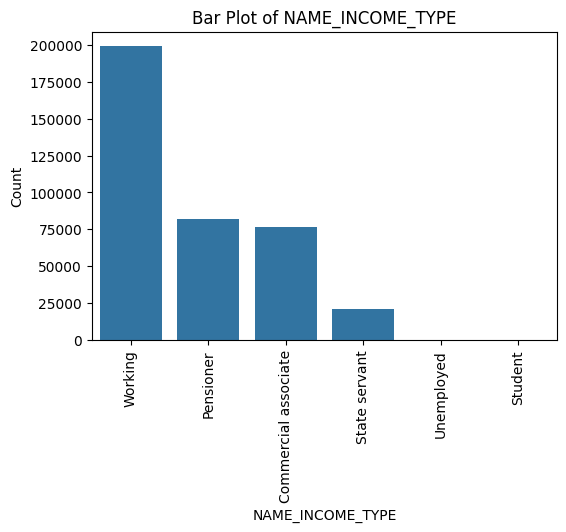

Analysis for NAME_EDUCATION_TYPE:


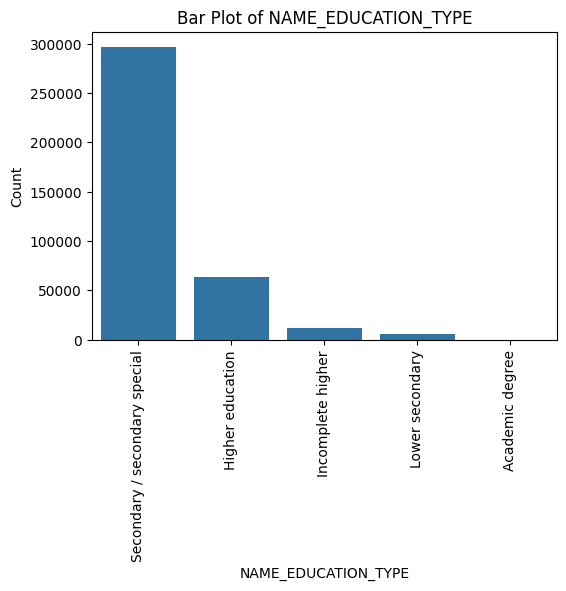

Analysis for NAME_FAMILY_STATUS:


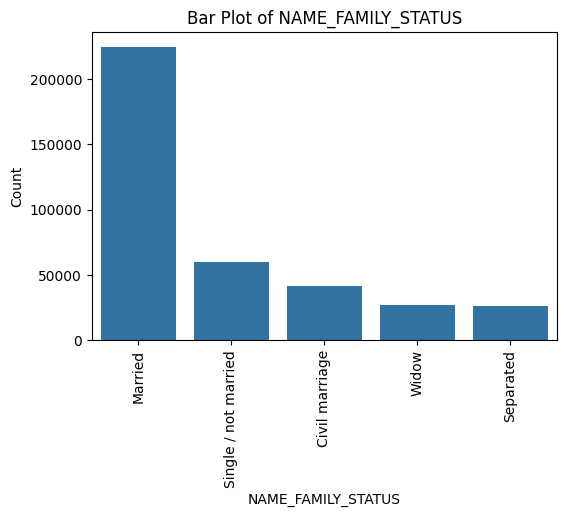

Analysis for NAME_HOUSING_TYPE:


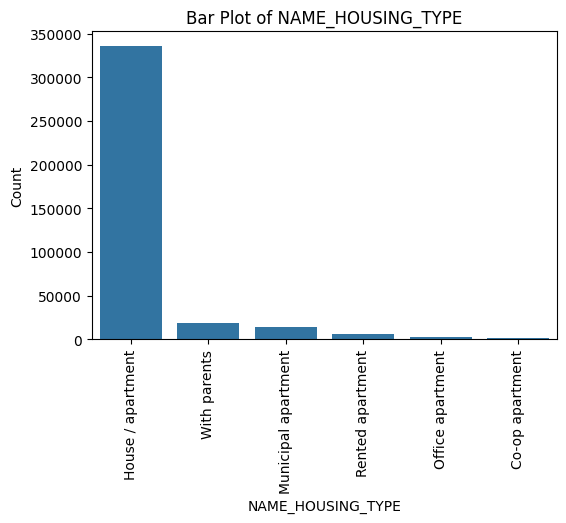

Analysis for REGION_POPULATION_RELATIVE:
Summary statistics:
count    378584.000000
mean          0.020029
std           0.010648
min           0.001276
25%           0.010032
50%           0.019101
75%           0.028663
max           0.046220
Name: REGION_POPULATION_RELATIVE, dtype: float64



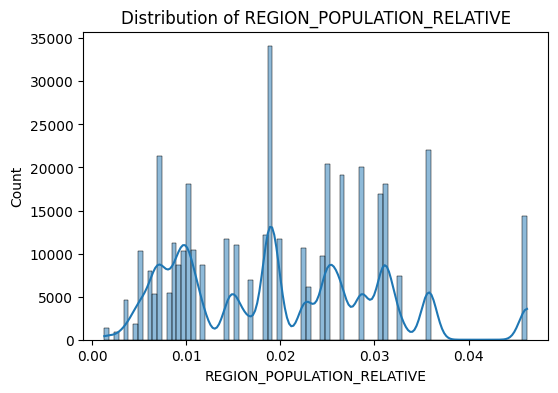

Analysis for OWN_CAR_AGE:
Summary statistics:
count    378584.000000
mean          8.261696
std           1.950995
min           0.000000
25%           9.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: OWN_CAR_AGE, dtype: float64



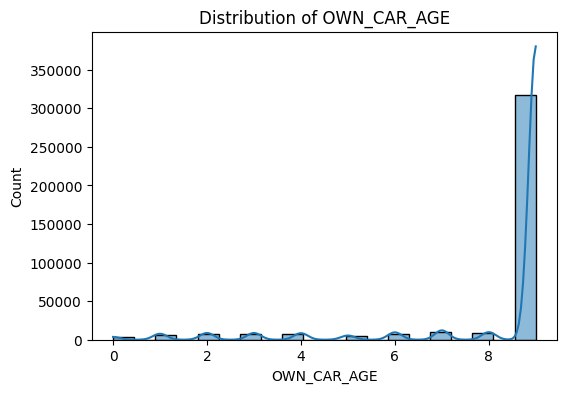

Analysis for OCCUPATION_TYPE:


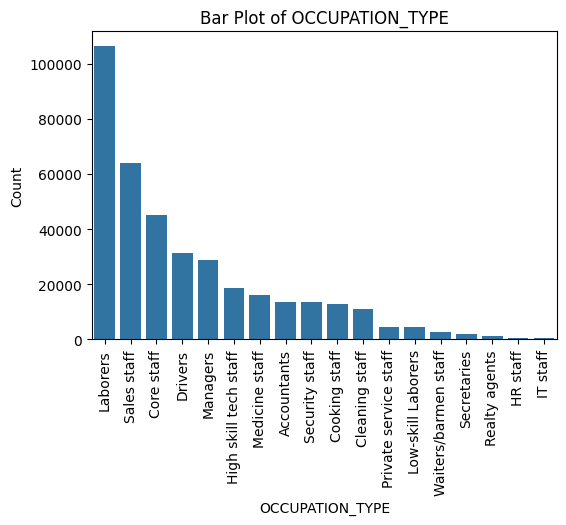

Analysis for CNT_FAM_MEMBERS:
Summary statistics:
count    378584.000000
mean          2.051893
std           0.837677
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: CNT_FAM_MEMBERS, dtype: float64



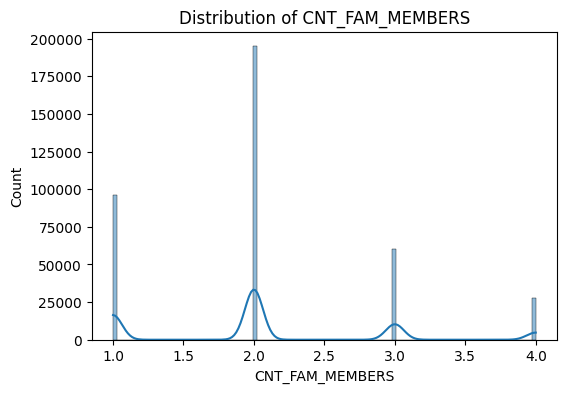

Analysis for REGION_RATING_CLIENT:
Summary statistics:
count    378584.000000
mean          1.929992
std           0.255161
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: REGION_RATING_CLIENT, dtype: float64



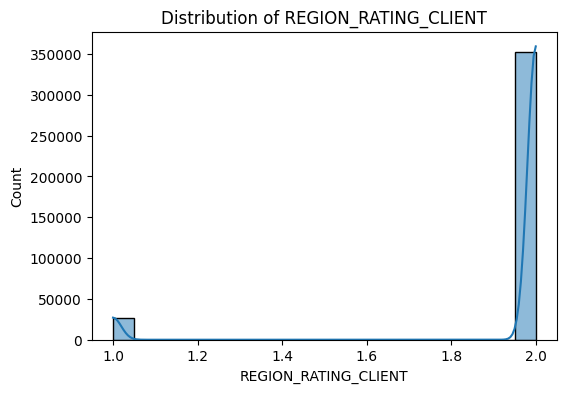

Analysis for ORGANIZATION_TYPE:


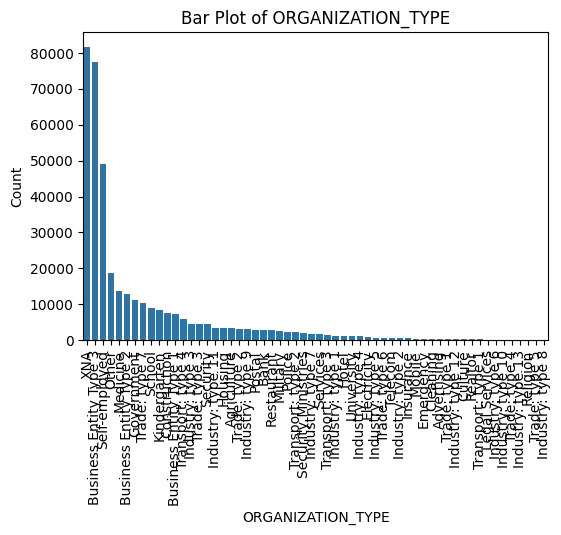

Analysis for EXT_SOURCE_1:
Summary statistics:
count    378584.000000
mean          0.459480
std           0.098710
min           0.015600
25%           0.499316
50%           0.505998
75%           0.505998
max           0.505998
Name: EXT_SOURCE_1, dtype: float64



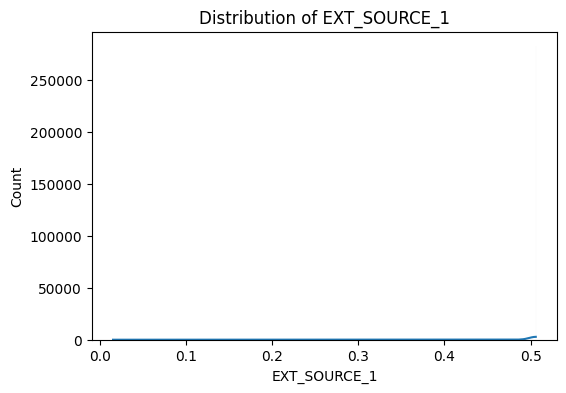

Analysis for EXT_SOURCE_2:
Summary statistics:
count    3.785840e+05
mean     5.046930e-01
std      1.904159e-01
min      8.173617e-08
25%      3.736136e-01
50%      5.582592e-01
75%      6.540971e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64



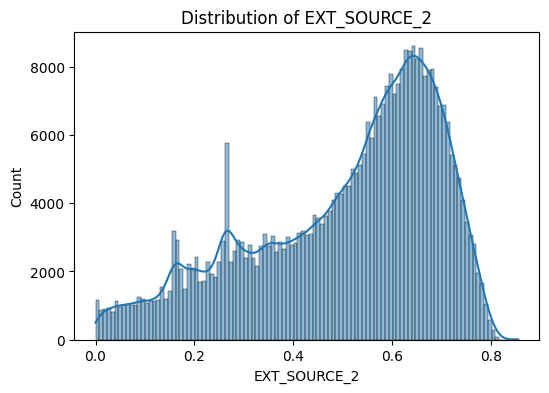

Analysis for EXT_SOURCE_3:
Summary statistics:
count    378584.000000
mean          0.505385
std           0.174863
min           0.000527
25%           0.408359
50%           0.535276
75%           0.614414
max           0.893976
Name: EXT_SOURCE_3, dtype: float64



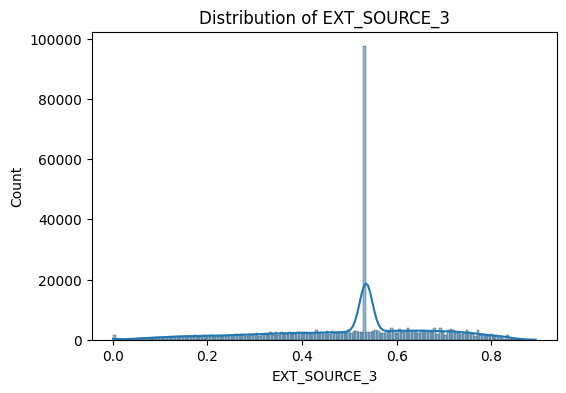

Analysis for NAME_CONTRACT_TYPE_y:


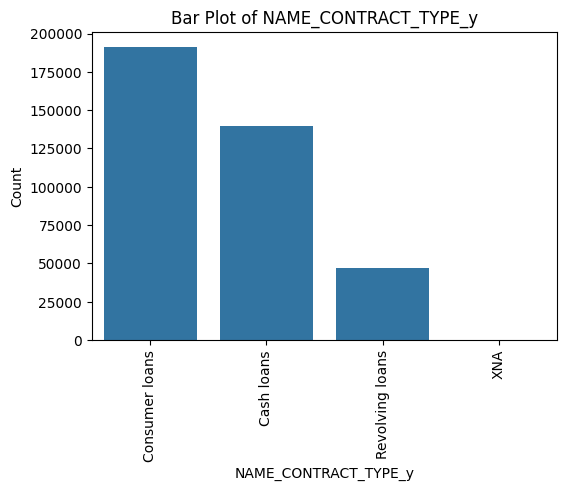

Analysis for AMT_ANNUITY_y:
Summary statistics:
count    378584.000000
mean      10385.661505
std        5419.469488
min           0.000000
25%        6325.335000
50%       11250.000000
75%       11674.530000
max       30760.650000
Name: AMT_ANNUITY_y, dtype: float64



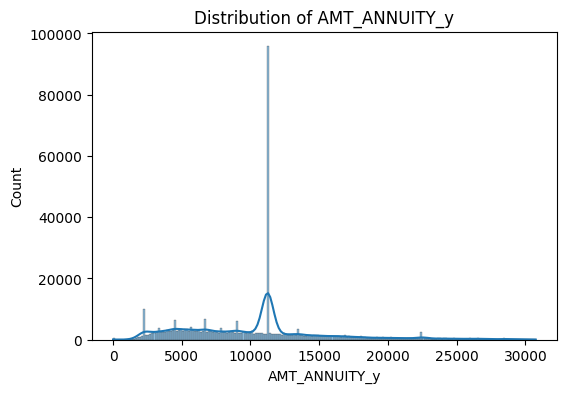

Analysis for AMT_APPLICATION:
Summary statistics:
count    378584.00000
mean      77146.12950
std       78668.90396
min           0.00000
25%           0.00000
50%       52605.00000
75%      117562.50000
max      405000.00000
Name: AMT_APPLICATION, dtype: float64



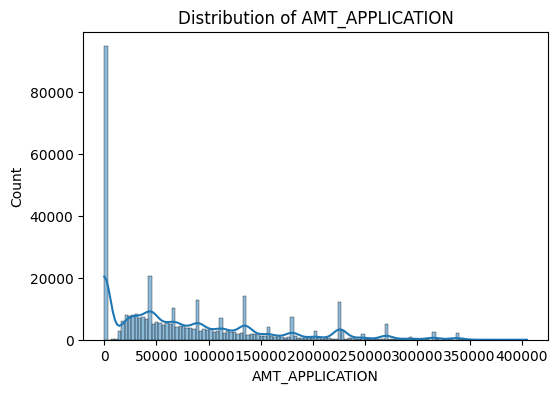

Analysis for AMT_CREDIT_y:
Summary statistics:
count    378584.000000
mean      88222.075376
std       91778.667008
min           0.000000
25%       20070.000000
50%       58450.500000
75%      134316.000000
max      499099.500000
Name: AMT_CREDIT_y, dtype: float64



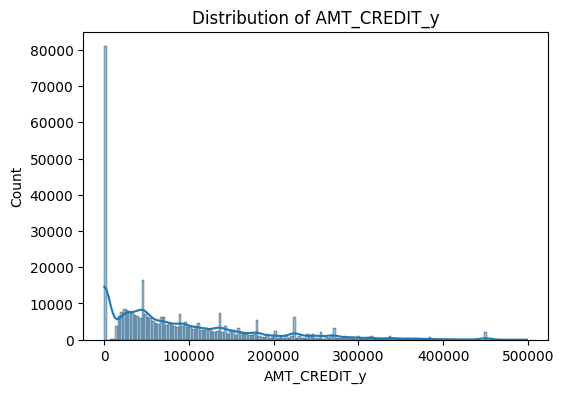

Analysis for AMT_GOODS_PRICE_y:
Summary statistics:
count    378584.000000
mean     104666.755623
std       65383.039386
min           0.000000
25%       51470.662500
50%      112320.000000
75%      117554.625000
max      350131.500000
Name: AMT_GOODS_PRICE_y, dtype: float64



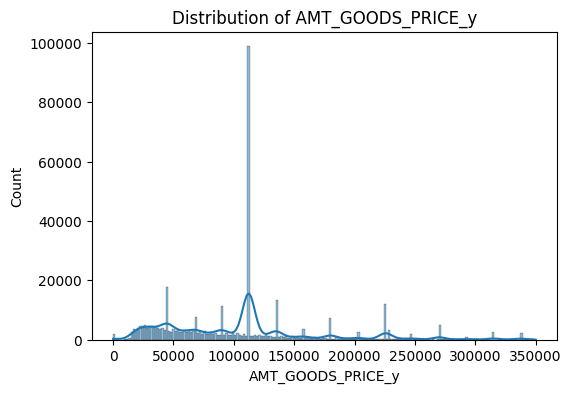

Analysis for NAME_CASH_LOAN_PURPOSE:


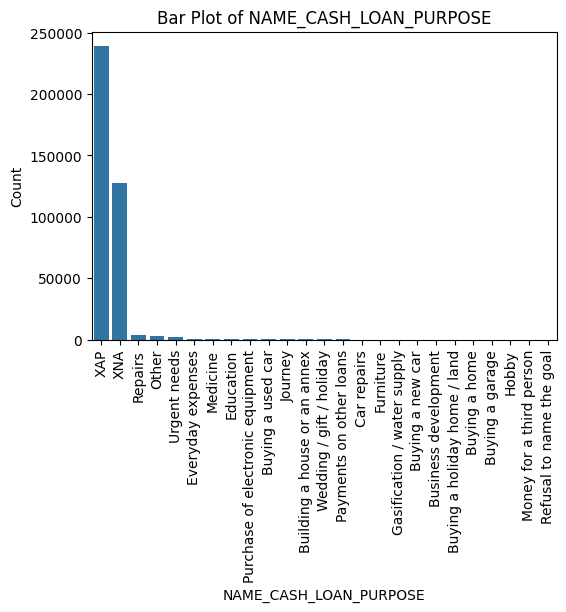

Analysis for NAME_CONTRACT_STATUS:


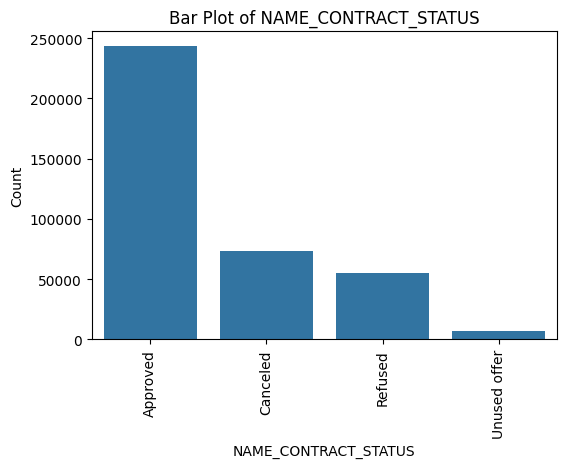

Analysis for NAME_PAYMENT_TYPE:


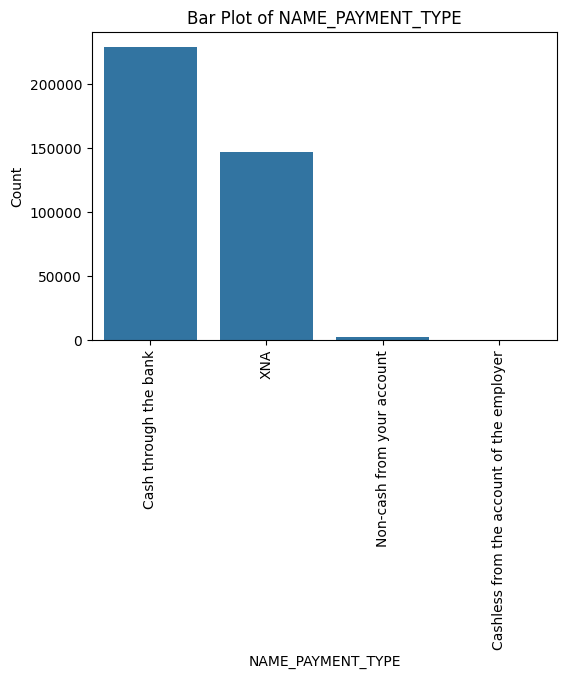

Analysis for CODE_REJECT_REASON:


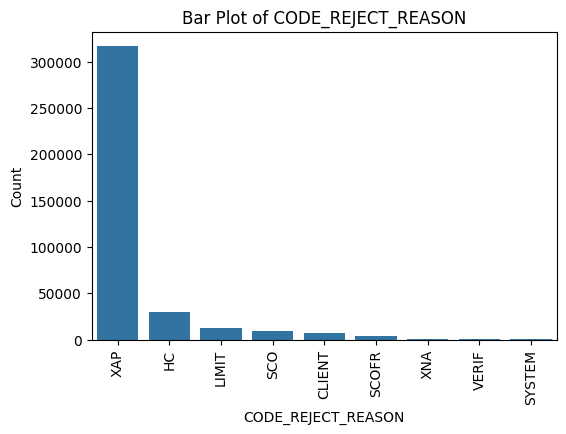

Analysis for NAME_CLIENT_TYPE:


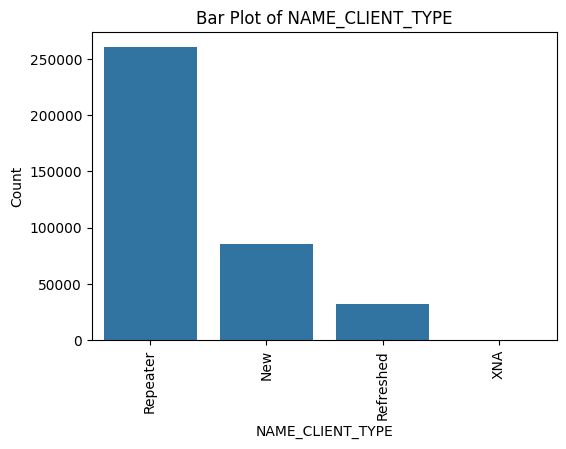

Analysis for NAME_YIELD_GROUP:


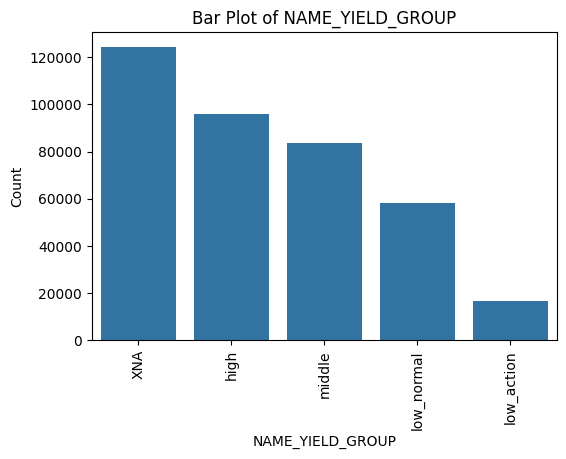

In [66]:
import matplotlib.pyplot as plt
list_no_graph=['SK_ID_CURR','TARGET','REGION_RATING_CLIENT_W_CITY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','SK_ID_PREV','']
# Loop through each column
for column in merge_df.columns:
    if column not in list_no_graph:
    # Check the data type of the column
      if merge_df[column].dtype == 'object':  # Categorical column
        print(f"Analysis for {column}:")
        # Bar plot for categorical data using seaborn
        plt.figure(figsize=(6, 4))
        sns.barplot(x=merge_df[column].value_counts().index, y=merge_df[column].value_counts().values)
        plt.xticks(rotation=90)
        plt.title(f"Bar Plot of {column}")
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

      else:  # Numerical column
         print(f"Analysis for {column}:")
         print("Summary statistics:")
         print(merge_df[column].describe())  # Summary statistics (mean, std, min, etc.)
         print()

        # Histogram with KDE (Kernel Density Estimate) for numerical data
         plt.figure(figsize=(6, 4))
         sns.histplot(merge_df[column], kde=True)
         plt.title(f"Distribution of {column}")
         plt.show()





In [74]:
merge_df.TARGET.value_counts()

,count
TARGET,
0,342437
1,36147


**Setting Threshold Value for Becoming Defaulter**

In [77]:
round(36147*100/(36147+342437),0) #Percentage of clients becoming defaulter in overall data

10.0

**Bivariate Analysis**

In [78]:
pd.crosstab(merge_df.CODE_GENDER,merge_df.TARGET) #to get frequencies of target column for gender

TARGET,0,1
CODE_GENDER,,
F,240829,22129
M,101600,14018
XNA,8,0


In [80]:
22129/(240829+22129)  # Percentage of females defaulting from total clients

0.08415412347218948

In [81]:
22129/(22129+14018)  # Percentage of females defaulting from total deafulting clients

0.6121946496251418

In [82]:
14018/(14018+101600)  # Percentage of males defaulting from total clients

0.12124409693992284

In [83]:
14018/(22129+14018)  # Percentage of males defaulting from total deafulting clients

0.3878053503748582

<Axes: xlabel='CODE_GENDER', ylabel='count'>

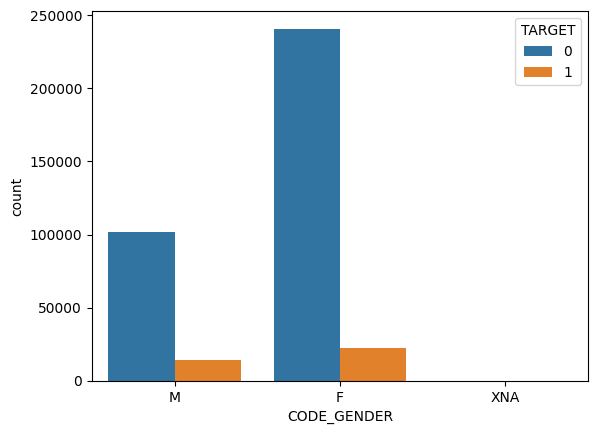

In [85]:
import seaborn as sns
sns.countplot(x='CODE_GENDER',hue='TARGET',data=merge_df) #to check influence of gender column on target column

In [67]:
df1=merge_df.loc[merge_df.TARGET==1] #to create new dataframe containing records having only 1(defaulter) as target column value

<Axes: xlabel='CODE_GENDER', ylabel='count'>

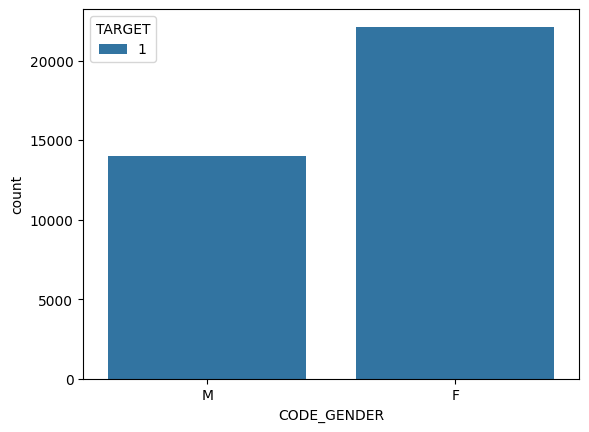

In [68]:
import seaborn as sns
sns.countplot(x='CODE_GENDER',hue='TARGET',data=df1) #to check influence of gender column on target column value of 1

In [ ]:
'''
 Conclusion-Overall there is 10% of defaulter credits.
 According to data, we observe that 4% more males	have a higher	chance of	not	returning	their	loans default than females.
 But females contributes 61% of total defaulters.
'''

<Axes: xlabel='FLAG_OWN_CAR', ylabel='count'>

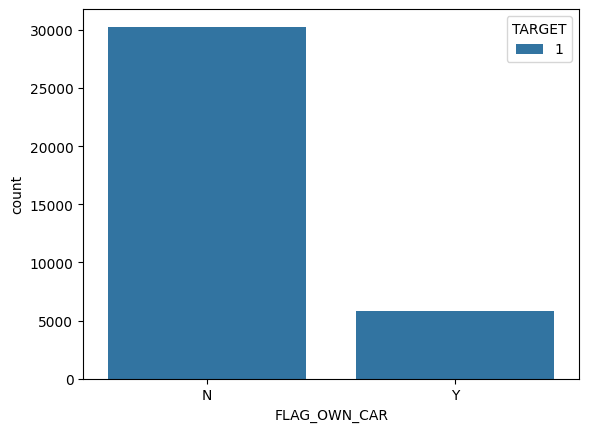

In [69]:
import seaborn as sns
sns.countplot(x='FLAG_OWN_CAR',hue='TARGET',data=df1) #to check influence of flag_own_car column on target column value of 1

In [ ]:
'''Conclusion-Clients those who own Car are less likely to default than those who don't own.'''

<Axes: xlabel='FLAG_OWN_REALTY', ylabel='count'>

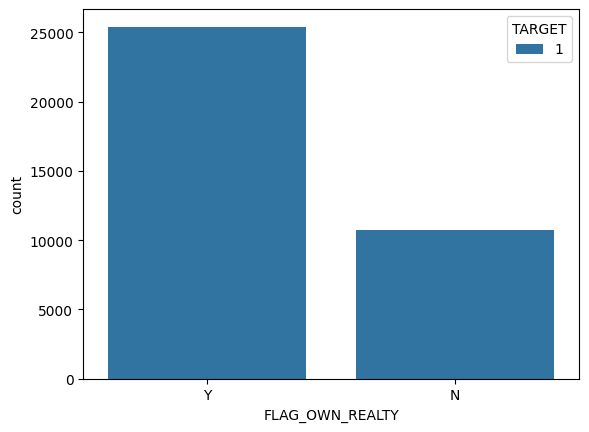

In [70]:
import seaborn as sns
sns.countplot(x='FLAG_OWN_REALTY',hue='TARGET',data=df1) #to check influence of flag_own_realty column on target column value of 1

In [ ]:
'''Conclusion-Clients those who own Real Estate are more likely to default than those who don't own.'''

<Axes: xlabel='CNT_CHILDREN', ylabel='count'>

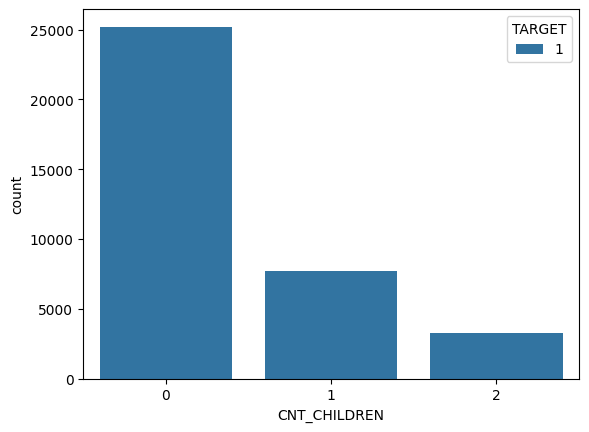

In [72]:
import seaborn as sns
sns.countplot(x='CNT_CHILDREN',hue='TARGET',data=df1) #to check influence of cnt_children column on target column value of 1

In [ ]:
'''Conclusion-Clients those who don't have children are more likely to default than those have 1 or 2.'''

([0, 1, 2, 3],
 [Text(0, 0, 'Secondary / secondary special'),
  Text(1, 0, 'Incomplete higher'),
  Text(2, 0, 'Higher education'),
  Text(3, 0, 'Lower secondary')])

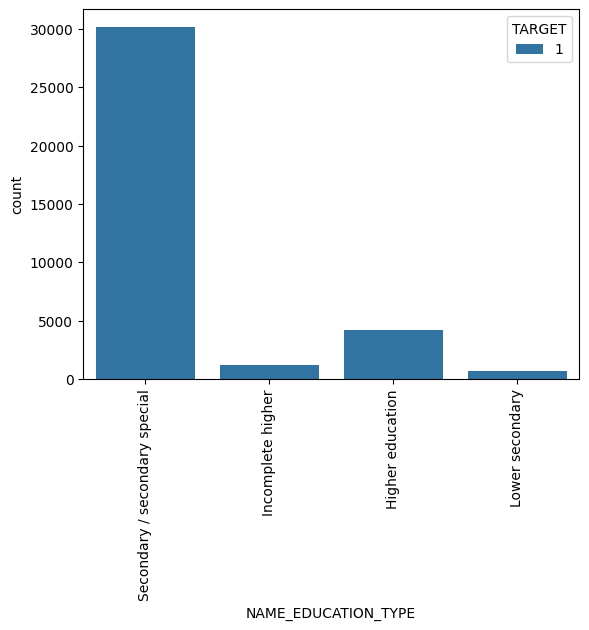

In [87]:
import seaborn as sns
sns.countplot(x='NAME_EDUCATION_TYPE',hue='TARGET',data=df1) #to check influence of name_education_type column on target column value 1
plt.xticks(rotation=90)

In [ ]:
'''Conclusion-Clients those who have completed Secondary Education & Higher Eduaction are more likely to default than those have not completed education.'''

<Axes: xlabel='AMT_CREDIT_x', ylabel='Count'>

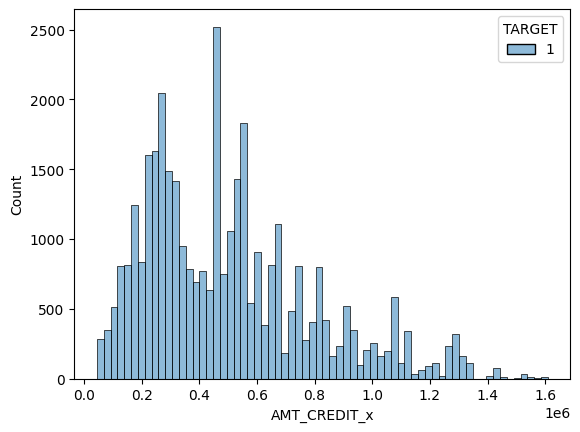

In [92]:
import seaborn as sns
sns.histplot(x='AMT_CREDIT_x',hue='TARGET',data=df1) #to check influence of amt_credit_x column on target column value 1

In [ ]:
'''Conclusion-Clients having credit amount in present applied loan in range of 3 to 6 lakhs are more likely to default than others.'''

**Multivariate Analysis**

In [125]:
crosstab = pd.crosstab(
    [merge_df['CODE_GENDER'], merge_df['NAME_FAMILY_STATUS']],  # Predictors: Gender and Family Status
    merge_df['TARGET'],                                         # Response: Target
    values=None,                                                # No aggregation
    aggfunc=None,                                               # Frequency count
)
crosstab.rename(columns={0: 'Good Client', 1: 'Defaulter Client', 'All': 'Total'}, inplace=True) #To create table having counts of tagert column according to gender & then further divided by family status


In [126]:
crosstab.rename_axis(['Gender', 'Family Status'], inplace=True) #Rename existing columns
print(crosstab)

TARGET                       Good Client  Defaulter Client
Gender Family Status                                      
F      Civil marriage              26730              2864
       Married                    136956             12674
       Separated                   18988              1518
       Single / not married        34017              3608
       Widow                       24138              1465
M      Civil marriage               9968              1734
       Married                     67234              8056
       Separated                    4585               780
       Single / not married        18990              3292
       Widow                         823               156
XNA    Married                         8                 0


In [127]:
multi_df=crosstab.reset_index() #Expand the Target column that is customised index
multi_df

TARGET,Gender,Family Status,Good Client,Defaulter Client
0,F,Civil marriage,26730,2864
1,F,Married,136956,12674
2,F,Separated,18988,1518
3,F,Single / not married,34017,3608
4,F,Widow,24138,1465
5,M,Civil marriage,9968,1734
6,M,Married,67234,8056
7,M,Separated,4585,780
8,M,Single / not married,18990,3292
9,M,Widow,823,156


In [128]:
multi_df=multi_df.drop(np.where(multi_df.Gender=='XNA')[0],axis=0) #Drop XNA value as gender because it will not be visible in graph

In [129]:
multi_df #To create table having counts of tagert column according to gender & then further divided by family status

TARGET,Gender,Family Status,Good Client,Defaulter Client
0,F,Civil marriage,26730,2864
1,F,Married,136956,12674
2,F,Separated,18988,1518
3,F,Single / not married,34017,3608
4,F,Widow,24138,1465
5,M,Civil marriage,9968,1734
6,M,Married,67234,8056
7,M,Separated,4585,780
8,M,Single / not married,18990,3292
9,M,Widow,823,156


<ipython-input-130-cb1faae7f0cc>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender',y='Defaulter Client',hue='Family Status',data=multi_df,ci=None) #to check influence of gender & family_status column on target column


<Axes: xlabel='Gender', ylabel='Defaulter Client'>

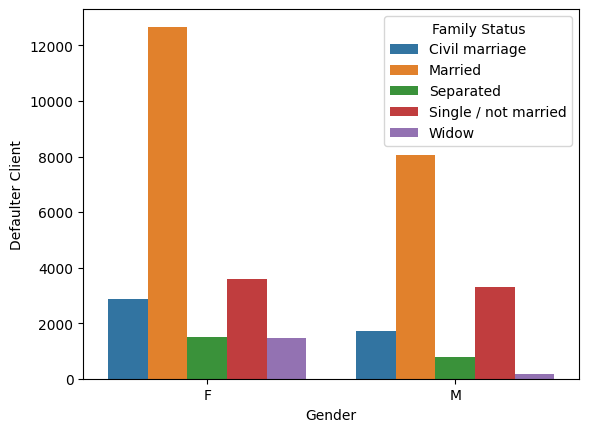

In [130]:
sns.barplot(x='Gender',y='Defaulter Client',hue='Family Status',data=multi_df,ci=None) #to check influence of gender & family_status column on target column

In [ ]:
'''Conclusion-Females & Males that are married are more likely to default than others.'''

<Axes: >

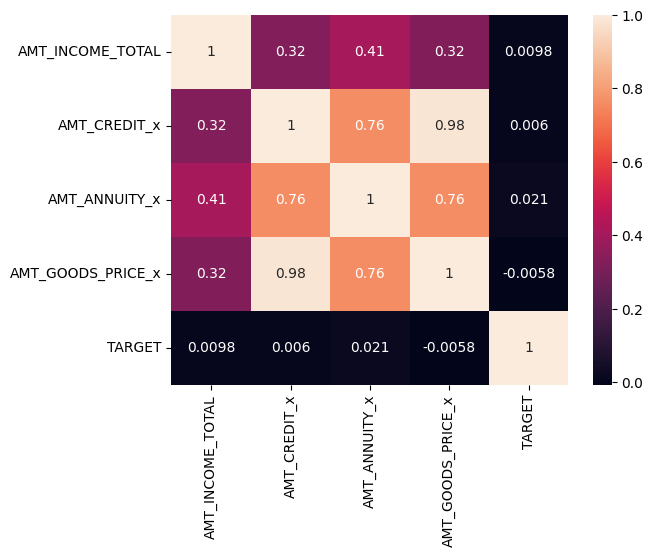

In [124]:
df_l=merge_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'TARGET']]
sns.heatmap(data=df_l.corr(),annot=True) #draw heatmap to derive relationship between 2 columns or variables


In [ ]:
'''Conclusion-Goods Price Amount & Credit Amount have a strong positive relationship than others as if Goods Price Amount increases then Credit Amount also increases.'''

In [73]:
'''
Conclusion-
1)Both males & females are likely to default.So,suggesting the need for targeted risk management strategies for both genders to reduce defaults.
2)Clients those who own Car are less likely to default.So,company could consider offering more competitive loan terms or incentives to attract non-car owners.
3)Clients who own real estate are more likely to default.So,company should carefully assess the debt-to-income ratio and other financial factors for property owners and consider offering tailored repayment plans
4)Clients who have no child are more likely to default.So,company should consider implementing stricter credit assessments for childless clients, such as evaluating additional financial stability factors or offering more personalized loan terms.
5)Clients whose credit amount is between 4-6 lakh range are more likely to default.So,company should consider offering more personalized loan terms, such as lower interest rates or extended repayment periods, for clients in this credit range.
6)Females & Males that are married are more likely to default.So,company should consider offering more flexible repayment options, personalized financial counseling
7)Goods Price Amount & Credit Amount have a strong positive relationship.So,company should carefully assess clients seeking higher credit amounts for expensive goods.
'''